### Handling Missing Data in Titanic Dataset
Task: Identify and handle missing values in the Titanic dataset. Experiment with different
strategies such as mean/median imputation, mode imputation, and dropping rows/columns.

Dataset: Titanic Dataset

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np


# Load dataset
titanic = pd.read_csv('BTW_Week5_Datasets/titanic.csv')

# Inspect for missing values
#print(titanic.isnull().sum())

# Mean/Median imputation for numerical features
imputer_mean = SimpleImputer(strategy='mean')
titanic['Age'] = imputer_mean.fit_transform(titanic[['Age']])

imputer_median = SimpleImputer(strategy='median')
titanic['Age'] = imputer_median.fit_transform(titanic[['Age']])

# Define the imputer_mode object
imputer_mode = SimpleImputer(strategy='most_frequent')
titanic['Age'] = imputer_mode.fit_transform(titanic[['Age']])

# Drop rows/columns with missing values
titanic_drop_rows = titanic.dropna()
titanic_drop_cols = titanic.dropna(axis=1)

#print(titanic.head())
print(titanic_drop_rows.head())
print(titanic_drop_cols.head())


    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S  
   PassengerId  Survived  Pclass

### Encoding Categorical Variables in a Car Evaluation Dataset
Task: Encode categorical variables in the Car Evaluation dataset using one-hot encoding
and label encoding. Compare the results.

Dataset: Car Evaluation Dataset

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load dataset
car = pd.read_csv('BTW_Week5_Datasets/car.csv')

# Identify categorical variables
categorical_features = car.select_dtypes(include=['object']).columns

# One-Hot Encoding
one_hot_encoder = OneHotEncoder()
car_one_hot = pd.get_dummies(car, columns=categorical_features)

# Label Encoding
label_encoder = LabelEncoder()
for feature in categorical_features:
    car[feature] = label_encoder.fit_transform(car[feature])

print(car_one_hot.head())
print(car.head())

   vhigh_high  vhigh_low  vhigh_med  vhigh_vhigh  vhigh.1_high  vhigh.1_low  \
0       False      False      False         True         False        False   
1       False      False      False         True         False        False   
2       False      False      False         True         False        False   
3       False      False      False         True         False        False   
4       False      False      False         True         False        False   

   vhigh.1_med  vhigh.1_vhigh   2_2    2_3  ...  small_big  small_med  \
0        False           True  True  False  ...      False      False   
1        False           True  True  False  ...      False      False   
2        False           True  True  False  ...      False       True   
3        False           True  True  False  ...      False       True   
4        False           True  True  False  ...      False       True   

   small_small  low_high  low_low  low_med  unacc_acc  unacc_good  \
0         True   

### Scaling Features in the Wine Quality Dataset
- Task: Apply normalization and standardization to the features in the Wine Quality dataset.
Analyze how scaling affects the distribution of data.

- Dataset: Wine Quality Dataset

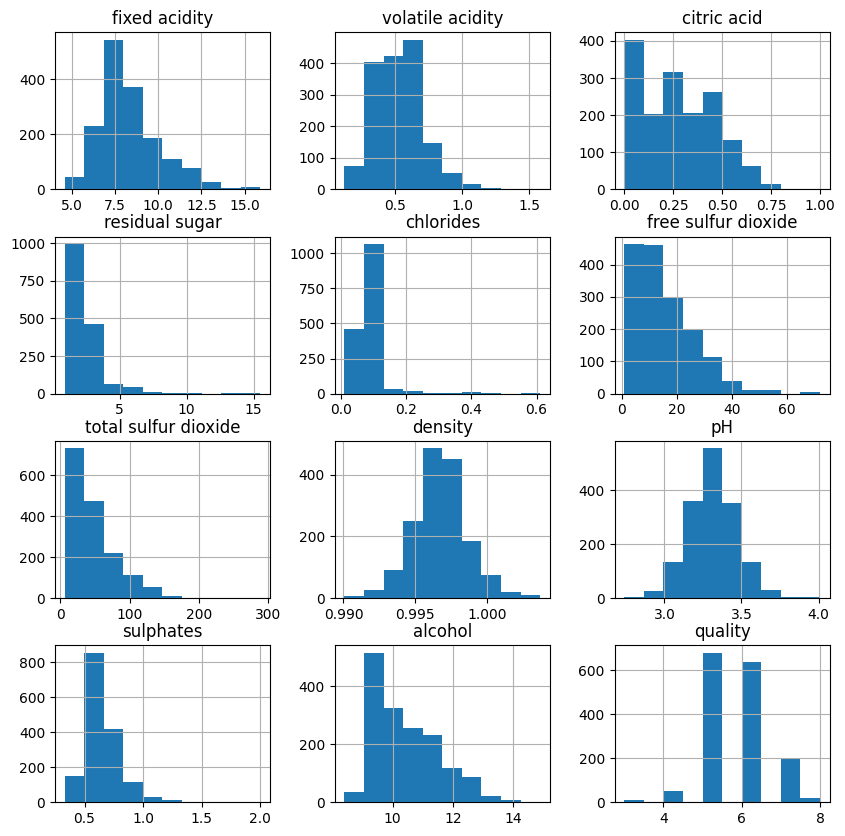

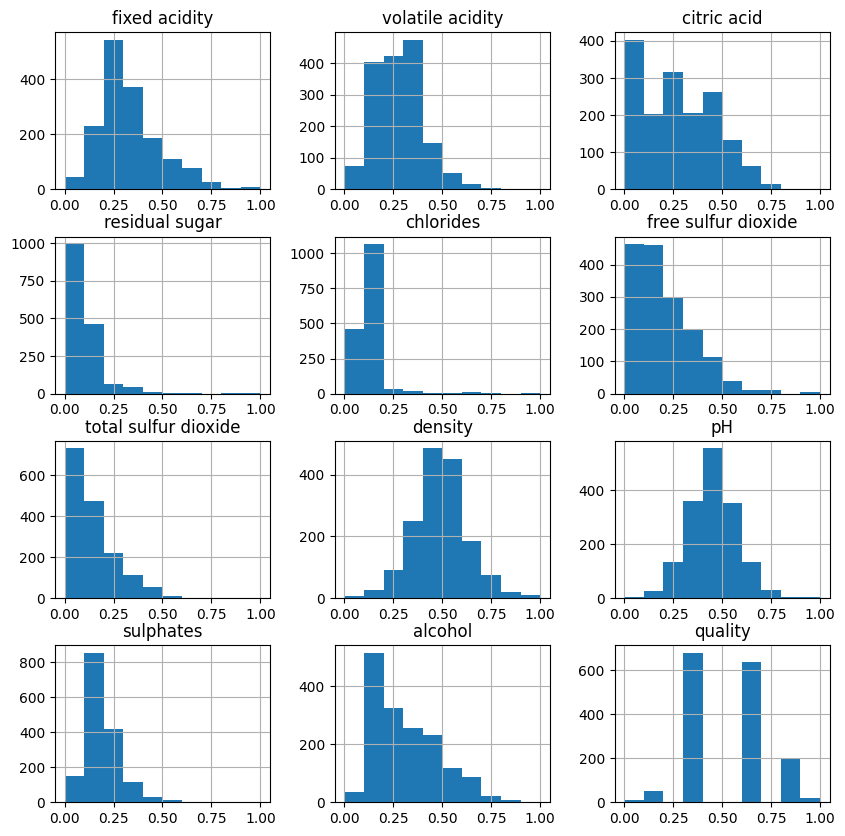

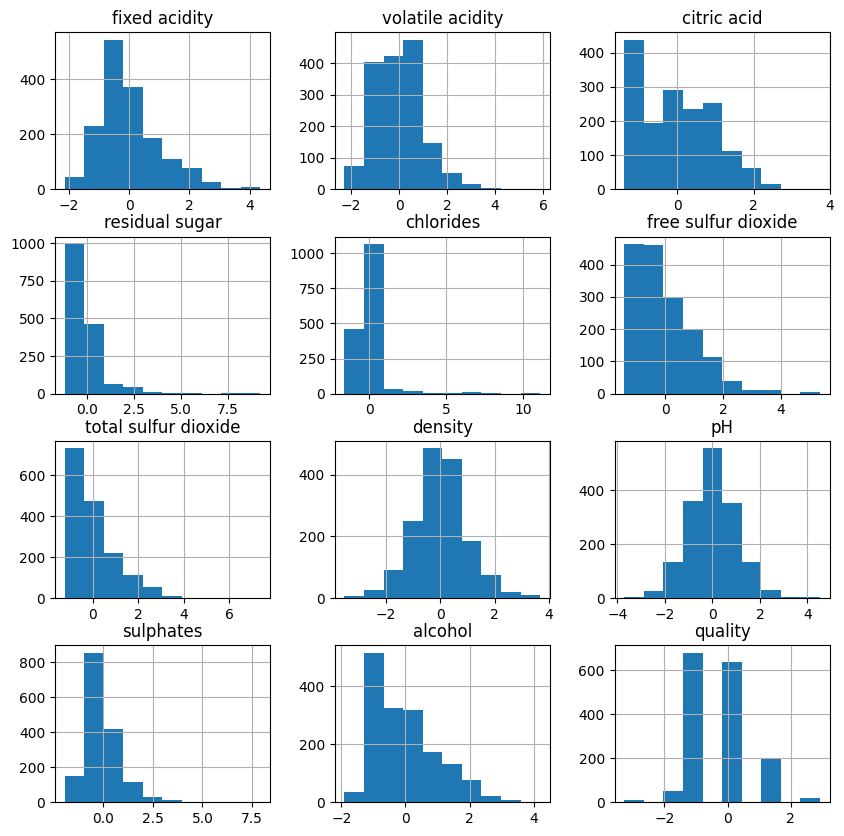

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
wine = pd.read_csv('BTW_Week5_Datasets/winequality-red.csv')

# Inspect feature distributions
wine.hist(figsize=(10, 10))
plt.show()

# Normalization (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
wine_normalized = scaler_minmax.fit_transform(wine)

# Standardization (Z-score Scaling)
scaler_standard = StandardScaler()
wine_standardized = scaler_standard.fit_transform(wine)

# Visualize scaled data
pd.DataFrame(wine_normalized, columns=wine.columns).hist(figsize=(10, 10))
plt.show()

pd.DataFrame(wine_standardized, columns=wine.columns).hist(figsize=(10, 10))
plt.show()


### Handling Outliers in the Boston Housing Dataset
- Task: Identify and handle outliers in the Boston Housing dataset using techniques like
Z-score, IQR, and visualization methods.

- Dataset: Boston Housing Dataset

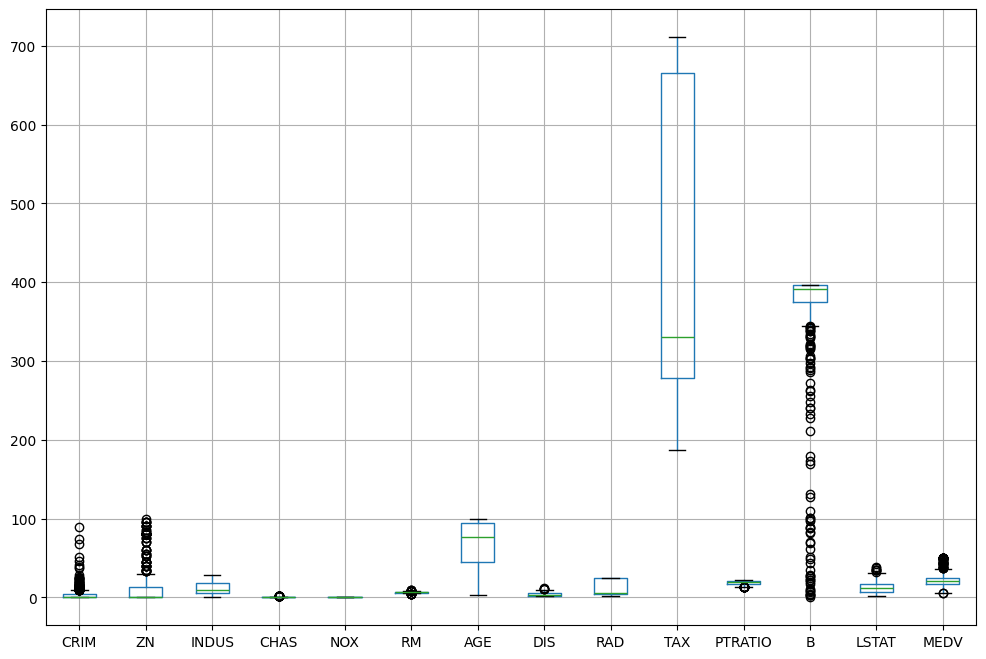

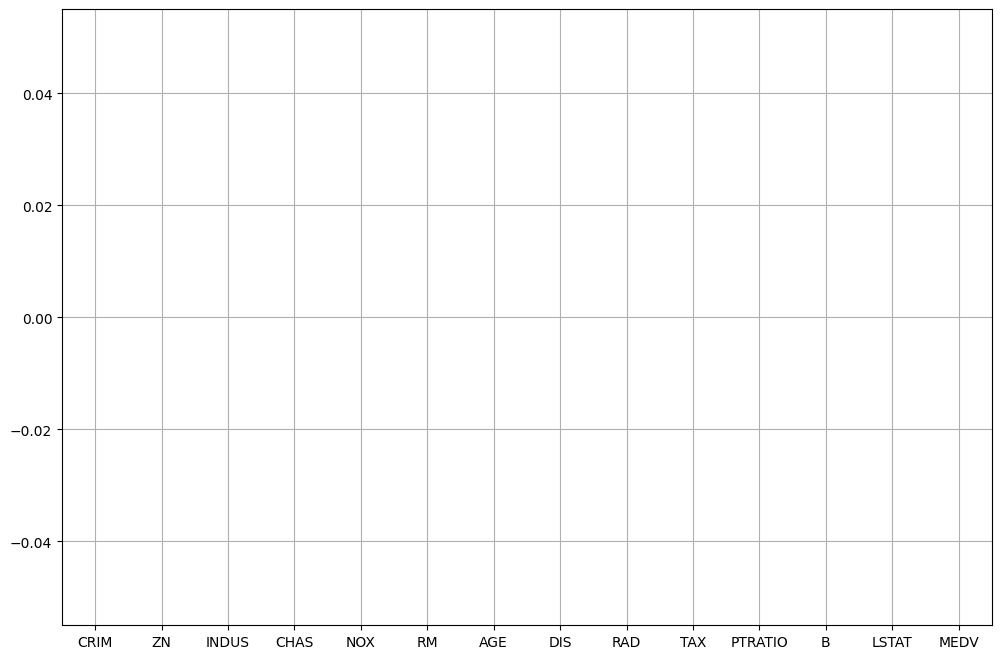

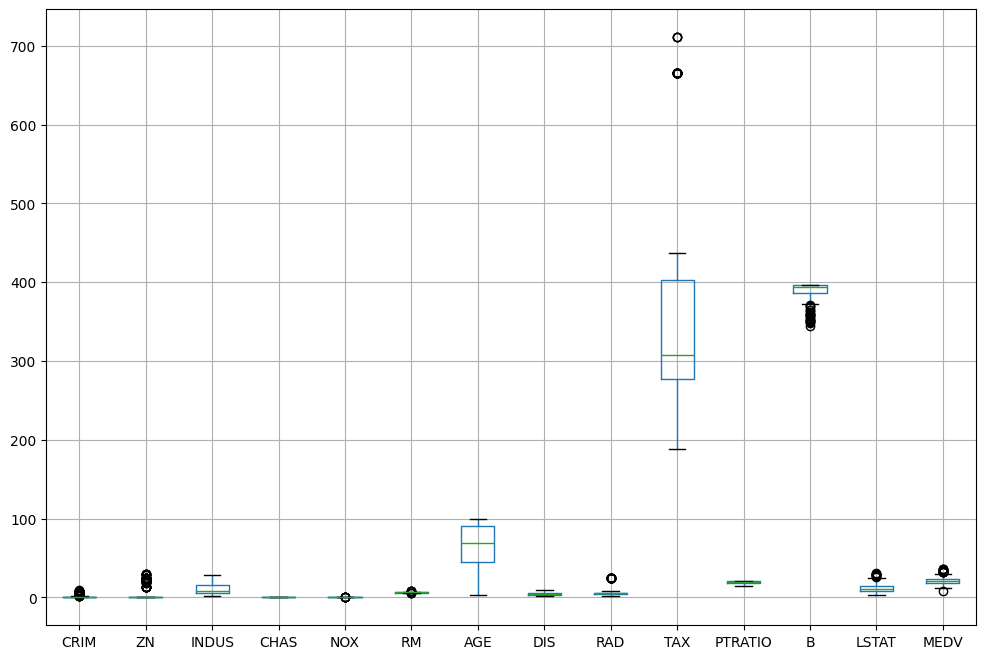

In [5]:
from scipy import stats

# Load dataset
boston = pd.read_csv('BTW_Week5_Datasets/HousingData.csv')

# Identify outliers using Z-score
z_scores = stats.zscore(boston)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
boston_no_outliers_z = boston[filtered_entries]

# Identify outliers using IQR
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1
boston_no_outliers_iqr = boston[~((boston < (Q1 - 1.5 * IQR)) | (boston > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualization
boston.boxplot(figsize=(12, 8))
plt.show()

boston_no_outliers_z.boxplot(figsize=(12, 8))
plt.show()

boston_no_outliers_iqr.boxplot(figsize=(12, 8))
plt.show()


###  Data Imputation in the Retail Sales Dataset
- Task: Handle missing values in the Retail Sales dataset using advanced imputation
techniques like KNN imputation and MICE.

- Dataset: Retail Sales Dataset

In [12]:
import pandas as pd
from sklearn.impute import KNNImputer
import miceforest as mf
from miceforest import ImputationKernel

# Load dataset
retail = pd.read_csv('BTW_Week5_Datasets/retail_sales_dataset.csv')

# Convert object columns to categorical
for col in retail.select_dtypes(include=['object']).columns:
    retail[col] = retail[col].astype('category')

# Separate numeric and non-numeric columns
numeric_columns = retail.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = retail.select_dtypes(exclude=['float64', 'int64']).columns

# KNN Imputation on numeric columns
knn_imputer = KNNImputer(n_neighbors=5)
retail_numeric_imputed = pd.DataFrame(knn_imputer.fit_transform(retail[numeric_columns]), columns=numeric_columns)

# Combine imputed numeric columns with non-numeric columns
retail_knn_imputed = pd.concat([retail_numeric_imputed, retail[non_numeric_columns].reset_index(drop=True)], axis=1)

# MICE Imputation
kernel = ImputationKernel(
    retail,
    datasets=5,
    save_all_iterations=True,
    random_state=1
)
kernel.mice(5, verbose=True)
retail_mice_imputed = kernel.complete_data(0)

print(retail_knn_imputed.head())
print(retail_mice_imputed.head())


Initialized logger with name mice 0-4
Dataset 0
0 
1 
2 
3 
4 
Dataset 1
0 
1 
2 
3 
4 
Dataset 2
0 
1 
2 
3 
4 
Dataset 3
0 
1 
2 
3 
4 
Dataset 4
0 
1 
2 
3 
4 
   Transaction ID   Age  Quantity  Price per Unit  Total Amount        Date  \
0             1.0  34.0       3.0            50.0         150.0  2023-11-24   
1             2.0  26.0       2.0           500.0        1000.0  2023-02-27   
2             3.0  50.0       1.0            30.0          30.0  2023-01-13   
3             4.0  37.0       1.0           500.0         500.0  2023-05-21   
4             5.0  30.0       2.0            50.0         100.0  2023-05-06   

  Customer ID  Gender Product Category  
0     CUST001    Male           Beauty  
1     CUST002  Female         Clothing  
2     CUST003    Male      Electronics  
3     CUST004    Male         Clothing  
4     CUST005    Male           Beauty  
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001

c:\Users\Developer\AppData\Local\Programs\Python\Python312\Lib\site-packages\miceforest\ImputationKernel.py:370: UserWarning: [Date,Customer ID] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


### Feature Engineering in the Heart Disease Dataset
- Task: Create new features from existing ones in the Heart Disease dataset, such as age
groups, cholesterol levels, and more.

- Dataset: Heart Disease Dataset

In [13]:
# Load dataset
heart = pd.read_csv('BTW_Week5_Datasets/heart_disease_data.csv')

# Create new features
heart['AgeGroup'] = pd.cut(heart['age'], bins=[29, 39, 49, 59, 69, 79], labels=['30-39', '40-49', '50-59', '60-69', '70-79'])
heart['CholesterolLevel'] = pd.cut(heart['chol'], bins=[0, 200, 240, 300], labels=['Normal', 'Borderline', 'High'])

print(heart.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target AgeGroup CholesterolLevel  
0   0     1       1    60-69       Borderline  
1   0     2       1    30-39             High  
2   0     2       1    40-49       Borderline  
3   0     2       1    50-59       Borderline  
4   0     2       1    50-59              NaN  


### Transforming Variables in the Bike Sharing Dataset
- Task: Apply transformations like log, square root, and Box-Cox transformations to skewed
variables in the Bike Sharing dataset.

- Dataset: Bike Sharing Dataset

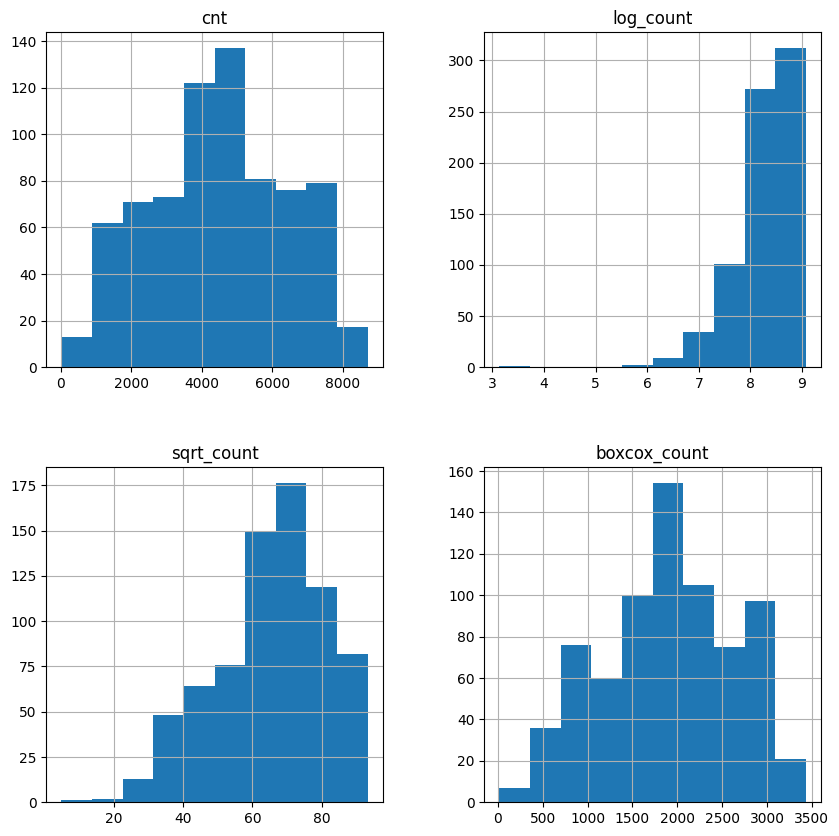

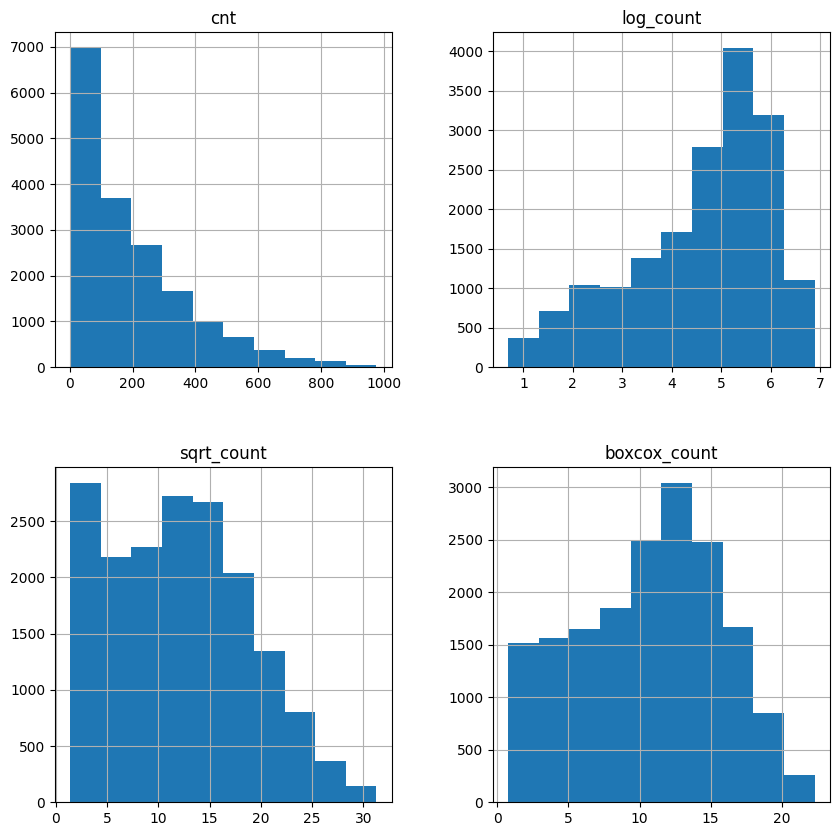

In [14]:
from scipy.stats import boxcox
import numpy as np

# Day wise dataset
# Load dataset
bike = pd.read_csv('BTW_Week5_Datasets/bike+sharing+dataset/day.csv')

# Identify skewed variables
skewed_vars = ['count']

# Apply log transformation
bike['log_count'] = bike['cnt'].apply(lambda x: np.log(x + 1))

# Apply square root transformation
bike['sqrt_count'] = bike['cnt'].apply(lambda x: np.sqrt(x + 1))

# Apply Box-Cox transformation
bike['boxcox_count'], _ = boxcox(bike['cnt'] + 1)

# Visualization
bike[['cnt', 'log_count', 'sqrt_count', 'boxcox_count']].hist(figsize=(10, 10))
plt.show()

# hourly dataset
# Load dataset
bike = pd.read_csv('BTW_Week5_Datasets/bike+sharing+dataset/hour.csv')

# Identify skewed variables
skewed_vars = ['count']

# Apply log transformation
bike['log_count'] = bike['cnt'].apply(lambda x: np.log(x + 1))

# Apply square root transformation
bike['sqrt_count'] = bike['cnt'].apply(lambda x: np.sqrt(x + 1))

# Apply Box-Cox transformation
bike['boxcox_count'], _ = boxcox(bike['cnt'] + 1)

# Visualization
bike[['cnt', 'log_count', 'sqrt_count', 'boxcox_count']].hist(figsize=(10, 10))
plt.show()



### Feature Selection in the Diabetes Dataset
- Task: Use techniques like correlation analysis, mutual information, and recursive feature
elimination (RFE) to select important features in the Diabetes dataset.

- Dataset: Diabetes Dataset

In [15]:
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression

# Load dataset
diabetes = pd.read_csv('BTW_Week5_Datasets/diabetes.csv')

# Correlation analysis
correlation_matrix = diabetes.corr()
print(correlation_matrix['Outcome'].sort_values(ascending=False))

# Mutual Information
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
print(mutual_info_series.sort_values(ascending=False))

# Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)
print(pd.Series(fit.support_, index=X.columns))


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64
Glucose                     0.126650
Age                         0.071415
BMI                         0.067526
SkinThickness               0.035428
Pregnancies                 0.034080
Insulin                     0.029384
DiabetesPedigreeFunction    0.012581
BloodPressure               0.000000
dtype: float64
Pregnancies                  True
Glucose                      True
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                          True
DiabetesPedigreeFunction     True
Age                          True
dtype: bool


### Dealing with Imbalanced Data in the Credit Card Fraud Detection Dataset
- Task: Handle imbalanced data in the Credit Card Fraud Detection dataset using
techniques like SMOTE, ADASYN, and undersampling.

- Dataset: Credit Card Fraud Detection Dataset

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Load dataset
df = pd.read_csv('BTW_Week5_Datasets/card_transdata.csv')

# Preprocess the dataset
df['fraud'] = df['fraud'].astype('category')
X = df.drop('fraud', axis=1)
y = df['fraud']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standard Scaler
scaler = StandardScaler()

# Logistic Regression Model
model = LogisticRegression()

# Evaluation function
def evaluate_model(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{class_report}')

# Original Data
print("Original Data:")
evaluate_model(ImbPipeline([('scaler', scaler), ('classifier', model)]), X_train, y_train, X_test, y_test)

# SMOTE
print("\nSMOTE:")
smote_pipeline = ImbPipeline([('smote', SMOTE(random_state=42)), ('scaler', scaler), ('classifier', model)])
evaluate_model(smote_pipeline, X_train, y_train, X_test, y_test)

# ADASYN
print("\nADASYN:")
adasyn_pipeline = ImbPipeline([('adasyn', ADASYN(random_state=42)), ('scaler', scaler), ('classifier', model)])
evaluate_model(adasyn_pipeline, X_train, y_train, X_test, y_test)

# Undersampling
print("\nUndersampling:")
undersample_pipeline = ImbPipeline([('undersample', RandomUnderSampler(random_state=42)), ('scaler', scaler), ('classifier', model)])
evaluate_model(undersample_pipeline, X_train, y_train, X_test, y_test)


Original Data:
Accuracy: 0.9586
Confusion Matrix:
[[271914   1957]
 [ 10463  15666]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273871
         1.0       0.89      0.60      0.72     26129

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000


SMOTE:
Accuracy: 0.9346333333333333
Confusion Matrix:
[[255600  18271]
 [  1339  24790]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273871
         1.0       0.58      0.95      0.72     26129

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000


ADASYN:
Accuracy: 0.9443233333333333
Confusion Matrix:
[[259064  14807]
 [  1896  24233]]
Classification Report:
           

### Combining Multiple Datasets in the Movie Lens Dataset
- Task: Combine and preprocess multiple related datasets from the Movie Lens dataset,
such as ratings, user information, and movie metadata.

- Dataset: Movie Lens Dataset

In [12]:
import pandas as pd

# Load datasets
movies = pd.read_csv('BTW_Week5_Datasets/Movie Lens/movies.csv')
ratings = pd.read_csv('BTW_Week5_Datasets/Movie Lens/ratings.csv')
users = pd.read_csv('BTW_Week5_Datasets/Movie Lens/users.csv')

# Merge datasets
movie_ratings = pd.merge(ratings, movies, on='movieId')
complete_data = pd.merge(movie_ratings, users, on='userId')

# Display the first few rows of the combined dataset
print("\nCombined Data:")
print(complete_data.head())

# Example of further analysis: Calculate average rating for each movie
average_ratings = complete_data.groupby('title')['rating'].mean().reset_index()
average_ratings.columns = ['title', 'average_rating']

# Display the first few rows of the average ratings
print("\nAverage Ratings:")
print(average_ratings.head())



Combined Data:
   userId  movieId_x  rating  timestamp_x                             title  \
0       2        318     3.0   1445714835  Shawshank Redemption, The (1994)   
1       2        318     3.0   1445714835  Shawshank Redemption, The (1994)   
2       2        318     3.0   1445714835  Shawshank Redemption, The (1994)   
3       2        318     3.0   1445714835  Shawshank Redemption, The (1994)   
4       2        318     3.0   1445714835  Shawshank Redemption, The (1994)   

        genres  movieId_y              tag  timestamp_y  
0  Crime|Drama      60756            funny   1445714994  
1  Crime|Drama      60756  Highly quotable   1445714996  
2  Crime|Drama      60756     will ferrell   1445714992  
3  Crime|Drama      89774     Boxing story   1445715207  
4  Crime|Drama      89774              MMA   1445715200  

Average Ratings:
                             title  average_rating
0                       '71 (2014)        4.000000
1  'Tis the Season for Love (2015)       